# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [39]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [41]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [42]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [43]:
# Extract all rows of data
# Find the table
table = soup.find('table', class_='table')

# Extract the table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract the table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    cell_data = [cell.text.strip() for cell in cells]
    rows.append(cell_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [44]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    cell_data = [cell.text.strip() for cell in cells]
    data_rows.append(cell_data)

In [45]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=headers)

In [46]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [47]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [48]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [49]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [50]:
# 1. How many months are there on Mars?
# Extract the month information from the 'Date' column
df['Month'] = df['terrestrial_date'].dt.month

# Display the DataFrame with the new 'Month' column
print(df.head())

# Count the unique months
unique_months = df['Month'].nunique()
print(f'There are {unique_months} unique months on Mars.')

   id terrestrial_date sol   ls month  min_temp  pressure  Month
0   2       2012-08-16  10  155     6     -75.0     739.0      8
1  13       2012-08-17  11  156     6     -76.0     740.0      8
2  24       2012-08-18  12  156     6     -76.0     741.0      8
3  35       2012-08-19  13  157     6     -74.0     732.0      8
4  46       2012-08-20  14  157     6     -74.0     740.0      8
There are 12 unique months on Mars.


In [51]:
# 2. How many Martian days' worth of data are there?
unique_days = df['terrestrial_date'].nunique()
print(f'There are {unique_days} Martian days\' worth of data.')

There are 1867 Martian days' worth of data.


In [52]:
# 3. What is the average low temperature by month?
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by month and calculate the average low temperature
average_low_temp_by_month = df.groupby('Month')['min_temp'].mean()

# Display the result
print(average_low_temp_by_month)

Month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64


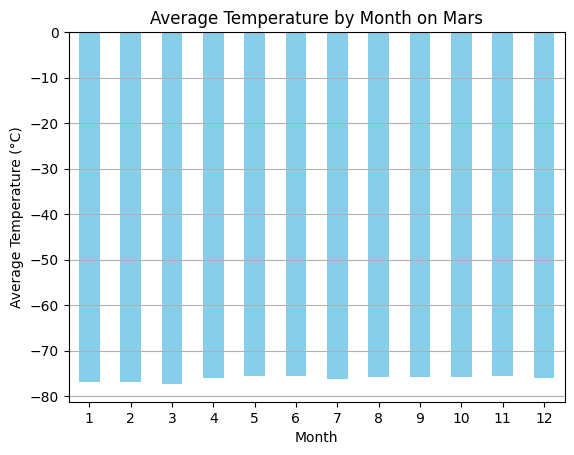

Month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64


In [55]:
# Plot the average temperature by month
average_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Display the result
print(average_low_temp_by_month)

In [58]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

print(f'The coldest month is month {coldest_month} with an average temperature of {average_low_temp_by_month[coldest_month]:.2f}°C.')
print(f'The hottest month is month {hottest_month} with an average temperature of {average_low_temp_by_month[hottest_month]:.2f}°C.')

The coldest month is month 3 with an average temperature of -77.35°C.
The hottest month is month 11 with an average temperature of -75.54°C.


In [59]:
# 4. Average pressure by Martian month
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Group by month and calculate the average pressure
average_pressure_by_month = df.groupby('Month')['pressure'].mean()

# Display the result
print(average_pressure_by_month)

Month
1     861.258621
2     837.967532
3     827.722222
4     817.676056
5     803.601399
6     807.910959
7     822.510638
8     829.606452
9     845.586207
10    865.475138
11    875.481013
12    875.260116
Name: pressure, dtype: float64


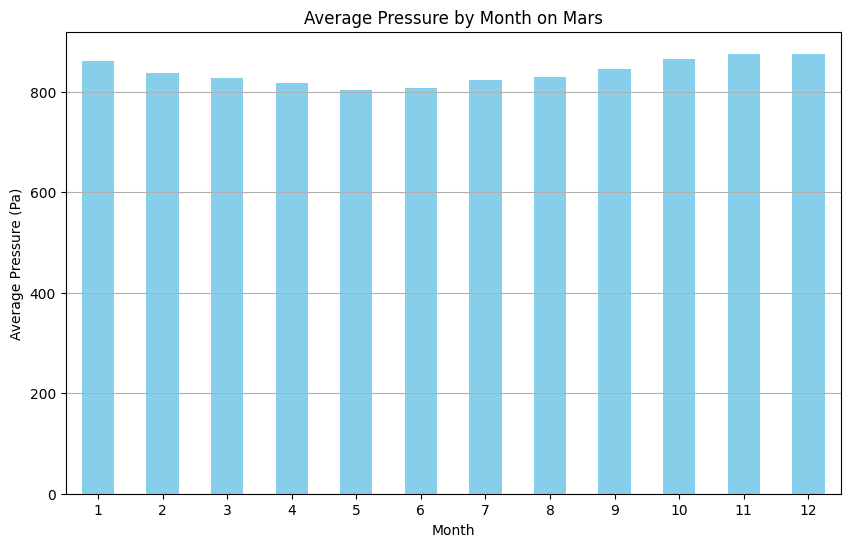

In [60]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

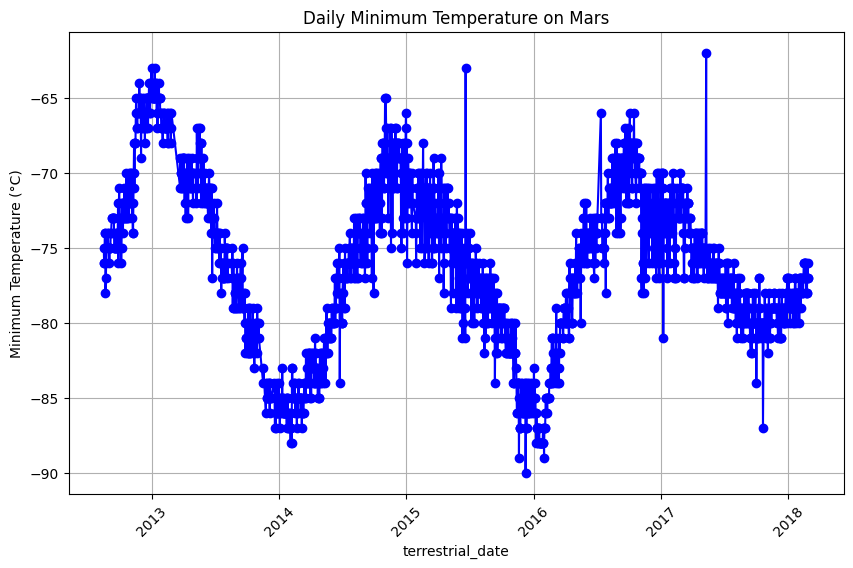

In [62]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('terrestrial_date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

5.5 Martian years as visually inspected from the above plot so there are 5.5 x 687 earth days = 3778.5 terrestrial (earth) days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)

In [21]:
browser.quit()